<a href="https://colab.research.google.com/github/mojoyinkimberly/penguin_classification/blob/main/ClassifyingPenguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

**reading dataset into python environment**

In [ ]:
penguin_dataset = pd.read_csv("/content/penguins_lter.csv", sep = ",")
penguin_dataset.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


**bar graph showing the different penguin species and the length of their culmen which is the dorsal ridge of a bird's bill.**

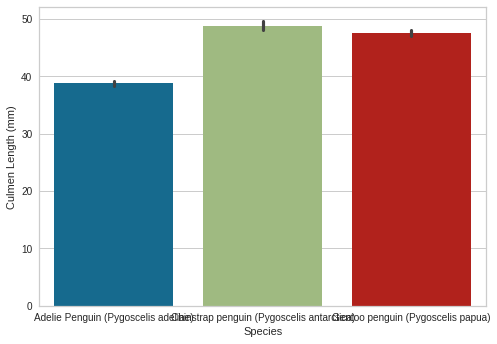

In [ ]:
sns.barplot(x='Species',y='Culmen Length (mm)',data=penguin_dataset)

**bar graph showing the different penguin species and the depth of culmen which is the dorsal ridge of a bird's bill.**

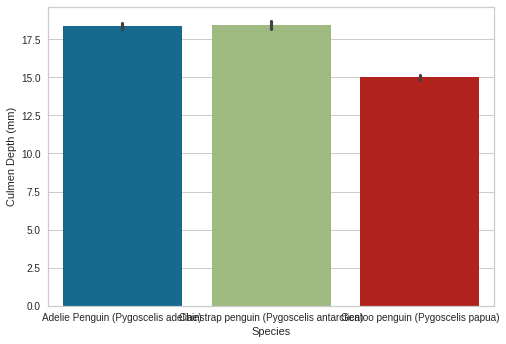

In [ ]:
sns.barplot(x='Species',y='Culmen Depth (mm)', data=penguin_dataset)

**bar graph showing the different penguin species and the variations in their flipper lengths**

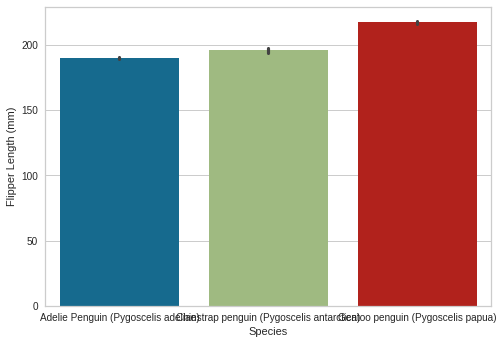

In [ ]:
sns.barplot(x = 'Species', y ='Flipper Length (mm)', data=penguin_dataset)

**bar graph showing different penguin species and their body mass**

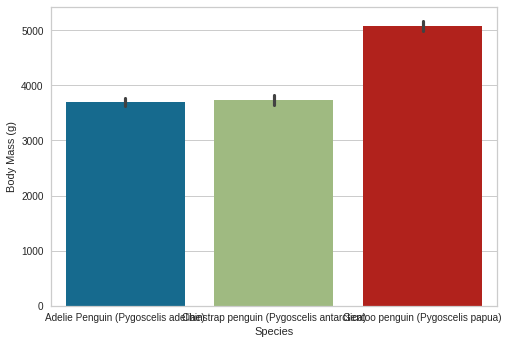

In [ ]:
sns.barplot(x='Species',y='Body Mass (g)', data = penguin_dataset)

**bar graph showing different penguin species and the numbers  denoting the measure of the ratio of their stable isotopes 15N:14N**

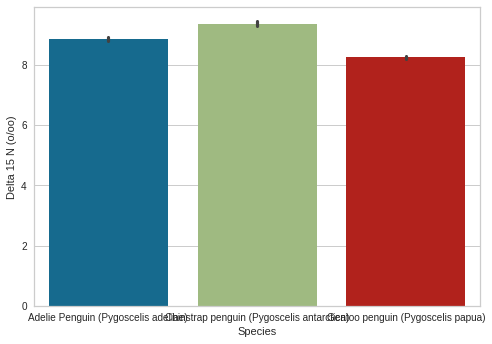

In [ ]:
sns.barplot(x = 'Species', y = 'Delta 15 N (o/oo)', data = penguin_dataset)

**bar graph showing the different penguin species and numbers denoting the measure of the ratio of their stable isotopes 13C:12C**

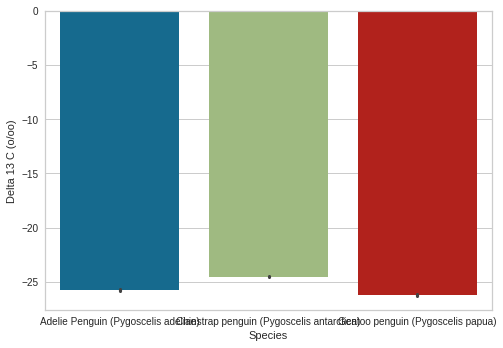

In [ ]:
sns.barplot(x = 'Species', y = 'Delta 13 C (o/oo)', data = penguin_dataset)

**bar graph showing the concentration of the Adelie penguin specie in all three islands as opposed to the other species using numbers denoting the measure of the ratio of their stable isotopes 13C:12C**

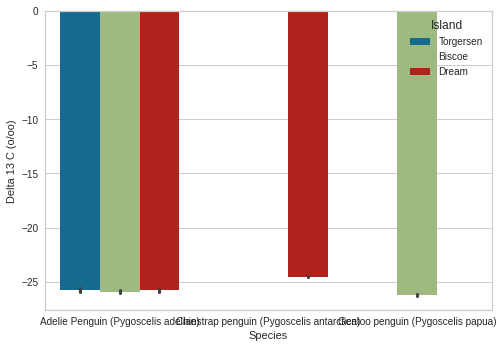

In [ ]:
sns.barplot(x = 'Species', y = 'Delta 13 C (o/oo)',hue = 'Island', data = penguin_dataset)

**bar graph showing the concentration of the Adelie penguin specie in all three islands as opposed to the other species using numbers denoting the measure of the ratio of their stable isotope 15N:14N**

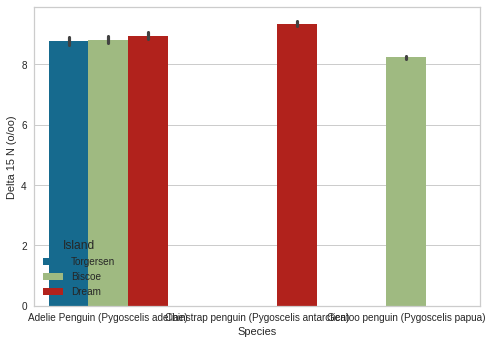

In [ ]:
sns.barplot(x = 'Species', y = 'Delta 15 N (o/oo)',hue = 'Island', data = penguin_dataset)

**bar graph showing the concentration of the Adelie Penguin in all three Islands as opposed to the two other species using the length of their culmen**

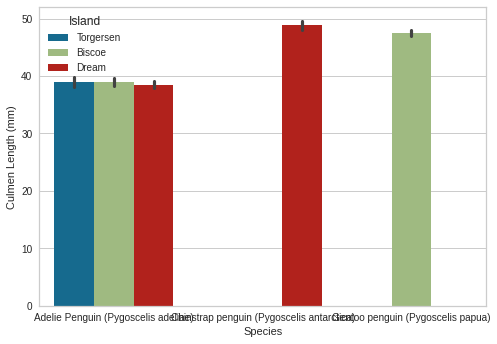

In [ ]:
sns.barplot(x = 'Species', y = 'Culmen Length (mm)',hue = 'Island', data = penguin_dataset)

**bar graph showing the concentration of the Adelie Penguin in all three Islands as opposed to the two other species using the depth of their culmen**

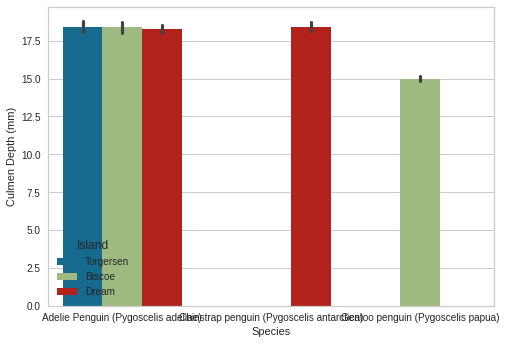

In [ ]:
sns.barplot(x = 'Species', y = 'Culmen Depth (mm)',hue = 'Island', data = penguin_dataset)

**bar graph showing the different species showing if the study nest was observed with a full clutch i.e., 2 eggs or not and also showing the differences in their culmen depth**

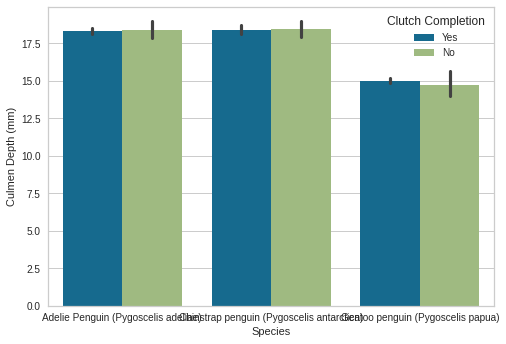

In [ ]:
sns.barplot(x = 'Species', y = 'Culmen Depth (mm)',hue = 'Clutch Completion', data = penguin_dataset)

**dropping the irrelevant columns**

In [ ]:
penguin1 = penguin_dataset.drop(['studyName','Sample Number','Individual ID','Stage','Comments','Region','Date Egg'],axis =1)

**using the ordinal encoder to convert objects to floats**

In [ ]:
encode = OrdinalEncoder()
penguin1[['specie', 'island','clutch_completion','sex']] = encode.fit_transform(penguin1[['Species','Island','Clutch Completion','Sex']])

**dropping the older columns**

In [ ]:
penguin2 = penguin1.drop(columns = ['Species','Island','Clutch Completion','Sex'])
penguin2

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),specie,island,clutch_completion,sex
0,39.1,18.7,181.0,3750.0,NaN,NaN,0.0,2.0,1.0,2.0
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454,0.0,2.0,1.0,1.0
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302,0.0,2.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN
340,46.8,14.3,215.0,4850.0,8.41151,-26.13832,2.0,0.0,1.0,1.0
341,50.4,15.7,222.0,5750.0,8.30166,-26.04117,2.0,0.0,1.0,2.0
342,45.2,14.8,212.0,5200.0,8.24246,-26.11969,2.0,0.0,1.0,1.0


**checking for missing values**

In [ ]:
penguin2.isna().sum()

Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
specie                  0
island                  0
clutch_completion       0
sex                    10
dtype: int64

**filling missing values with median values**

In [ ]:
penguin3 = penguin2.fillna(penguin2.median())

**using the describe function to check for outliers and statistical summary**

In [ ]:
penguin3.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),specie,island,clutch_completion,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093,8.730086,-25.691855,0.918605,0.662791,0.895349,1.514535
std,5.443792,1.969060,14.023826,799.696532,0.540630,0.779277,0.893320,0.726194,0.306549,0.506308
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,0.000000,0.000000,0.000000,0.000000
25%,39.275000,15.600000,190.000000,3550.000000,8.307415,-26.285460,0.000000,0.000000,1.000000,1.000000
50%,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520,1.000000,1.000000,1.000000,2.000000
75%,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467,2.000000,1.000000,1.000000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670,2.000000,2.000000,1.000000,2.000000


**for loop plotting box plots to check for outliers**

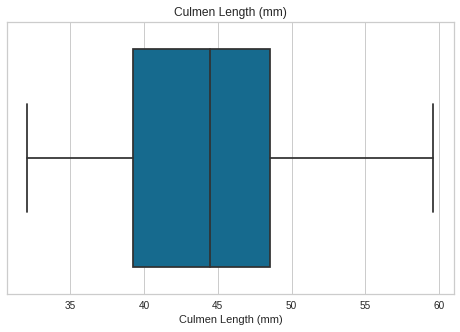

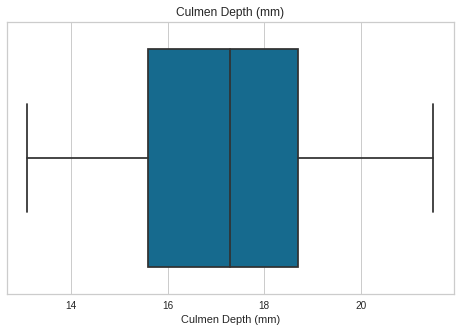

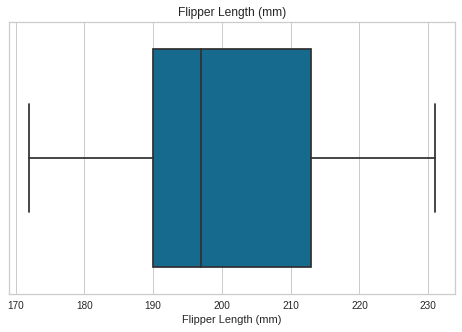

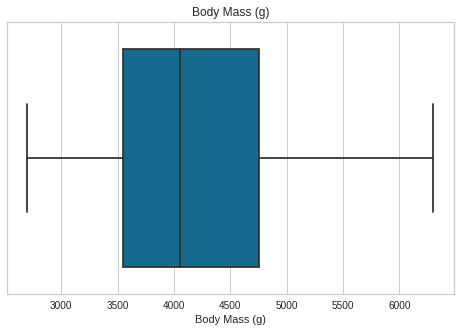

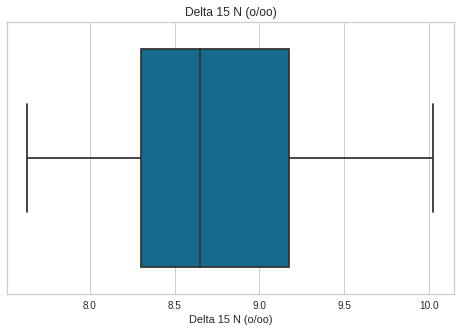

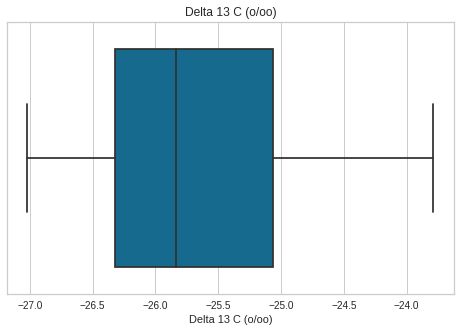

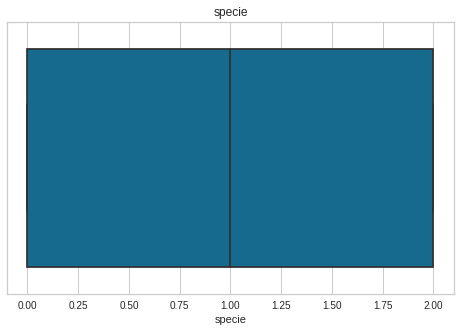

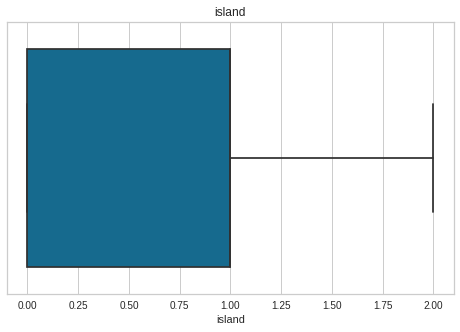

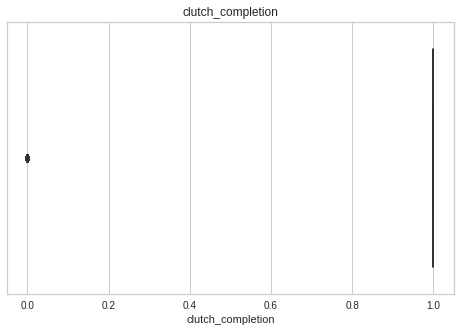

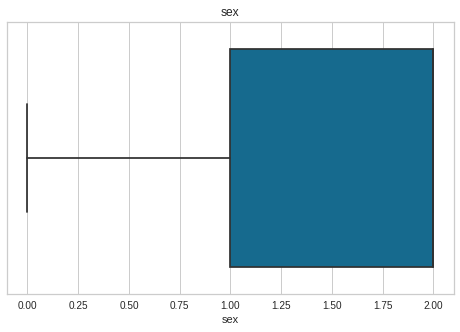

In [ ]:
for column in ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'specie', 'island', 'clutch_completion', 'sex']:
  plt.figure(figsize=(8, 5))
  sns.boxplot(data = penguin2, x = column)
  plt.title(column)
  plt.show()

**heat map showing correlation between dependent and independent variables**

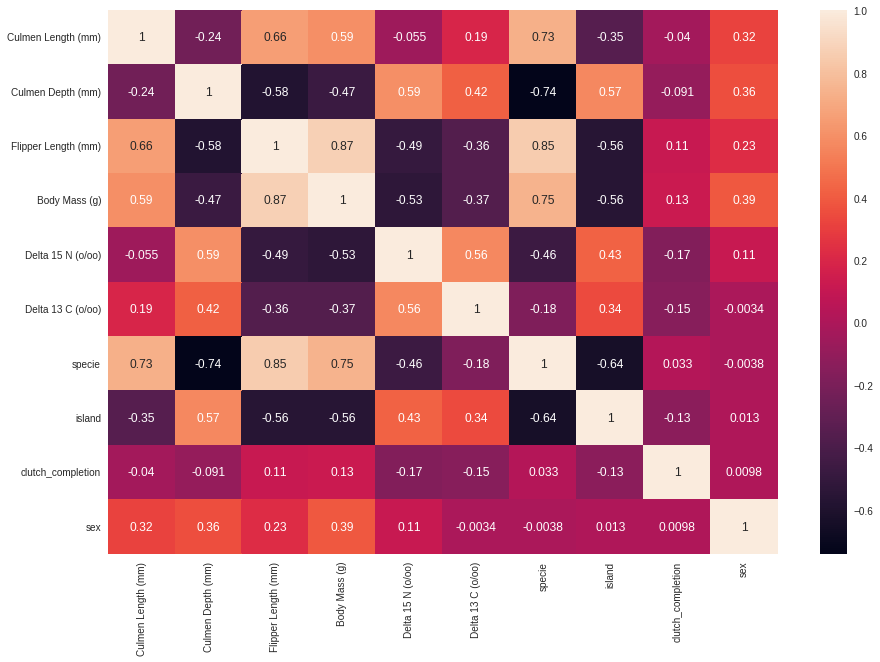

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(penguin3.corr(), annot = True)

**splitting dataset into depedent and independent variables**

In [ ]:
y = penguin3['specie']
x = penguin3.drop(['specie'],axis = 1)

In [ ]:
def calcu_mult(df):
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return vif

**using the variance inflation factor to check for multicollinearity**

In [ ]:
calcu_mult(x)

,variables,VIF
0,Culmen Length (mm),189.653197
1,Culmen Depth (mm),210.379120
2,Flipper Length (mm),1276.667031
3,Body Mass (g),179.144285
4,Delta 15 N (o/oo),445.254466
5,Delta 13 C (o/oo),800.280368
6,island,3.280206
7,clutch_completion,10.016102
8,sex,20.303600


**Using the random over sampler to balance our categorical dependent variable in other to avoid bias in our model**

In [ ]:
sample = RandomOverSampler(random_state = 0)
x, y = sample.fit_resample(x, y)

**normalizing dataset using the standard scaler**

In [ ]:
normalizer = StandardScaler()
normed = pd.DataFrame(normalizer.fit_transform(x))

**splitting our normalized dataset into train and test**

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(normed, y, test_size=.20, random_state= 45)

**using the principal component analysis to check for important features**

In [ ]:
pca = PCA(n_components=9)
pca_model = pca.fit(normed)
PCA(n_components = 9)

PCA(n_components=9)

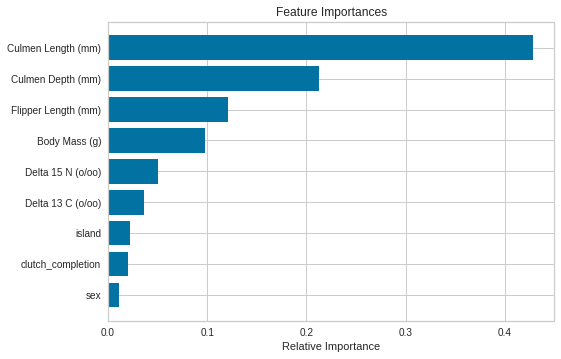

In [ ]:
features = x.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**using the elbow method to determine the number of clusters in a data set**

Text(0.5, 1.0, 'Elbow curve')

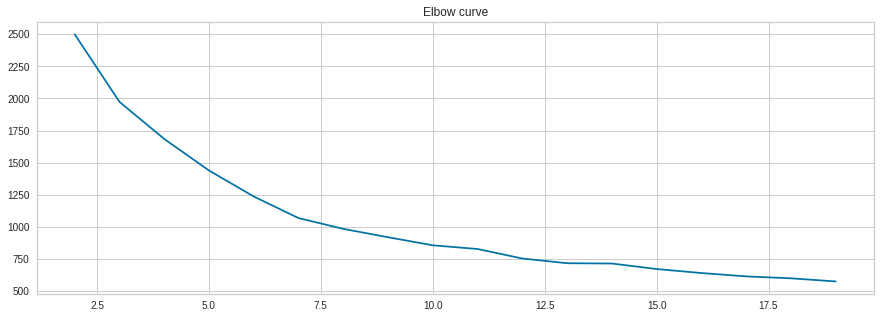

In [ ]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normed)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

**using the silhouette visualizer to show the scores of each cluster in a single model**

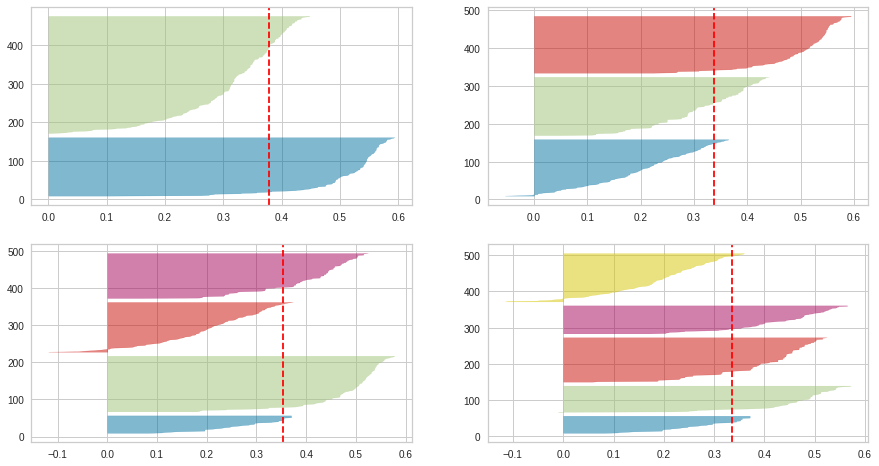

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(normed)

**fitting the training test into K-Neighbors Classifier model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train,y_train)

**checking accuracy score**

In [ ]:
knn_model.score(X_train,y_train)

0.9972527472527473

**predicting with the test**

In [ ]:
y_predict = knn_model.predict(x_test)

**using the confusion matrix to display the four quadrants that show the true and false positive and negative classes**

In [ ]:
confusion_matrix(y_test, y_predict)

array([[28,  1,  0],
       [ 0, 32,  0],
       [ 0,  0, 31]])

**From the confusion matrix above the model was able to classify 28 out of 29 for Adelie Penguin species, and 32 of Chinstrap penguin, 31 Gentoo penguin**

**printing the precision,recall,and f1-score to determine how well the model has classified the dataset.**

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        29
         1.0       0.97      1.00      0.98        32
         2.0       1.00      1.00      1.00        31

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



**From the above classification report we can see that our model has 0.98 percent for classifying correctly the Adelie Penguin, 0.98 percent for classifying correctly the Chinstrap penguin, and then 100 percent for classifying correctly the Gentoo penguin with accuracy of 0.99.**

**using the repeated k fold model to cross validate**

In [ ]:
Cv_ = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
score = cross_val_score(knn_model, x_test, y_test, scoring = "accuracy", cv = Cv_, n_jobs=1, error_score="raise")
np.mean(score)

0.9888888888888889

**The cross validation of our model shows that our model has 0.99 percentage of predicting correctly which is a good score given that our train and test score is the same**